In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# preprocessing data 
import numpy as np
import pandas as pd

# import training and testing dataset
train_data = pd.read_csv('/content/drive/MyDrive/KDD/KDDTrain+.csv')

test_data = pd.read_csv('/content/drive/MyDrive/KDD/KDDTest+.csv')

y_train = (train_data.label == 'normal').astype(int)
y_train = y_train.to_frame()
features = [c for c in train_data.columns if (c != "label") and (c != "diff_lev")]
X_train = train_data[features]

y_test = (test_data.label == 'normal').astype(int)
y_test = y_test.to_frame()
features = [c for c in test_data.columns if (c != "label") and (c != "diff_lev")]
X_test = test_data[features]

# label encoding data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X = pd.concat([X_train, X_test])

list_encode = ['protocol_type', 'service', 'flag']

for i in list_encode:
    X[i] = le.fit_transform(X[i])
    
X_train.iloc[:125973,:] = X.iloc[:125973,:]
X_test.iloc[:22544,:] = X.iloc[125973:,:]    

# feature scaling
from sklearn.preprocessing import Normalizer
scaler = Normalizer()

X_train.iloc[:,:] = scaler.fit_transform(X_train.to_numpy())
X_test.iloc[:,:] = scaler.transform(X_test.to_numpy())

from tensorflow.keras.models import model_from_json
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model 
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

# predict test set resutl and make confusion matrix
y_pred = loaded_model.predict(X_test)
y_pred_binary = (y_pred > 0.5)
from sklearn.metrics import confusion_matrix

def get_confusion_matrix_values(z_true, z_pred):
    cm = confusion_matrix(z_true, z_pred)
    return(cm[0][0], cm[0][1], cm[1][0], cm[1][1])

TP, FP, FN, TN = get_confusion_matrix_values(y_test, y_pred_binary)
detection_rate = TP/(TP+FN)
false_alarm_rate = FP/(TN+FP)
accuracy = (TP+TN)/(TP+FP+TN+FN)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
F1 = (2*precision*recall)/(precision + recall)

print("\n Detection rate = ", detection_rate, "\n")
print("False alarm rate = ", false_alarm_rate, "\n")
print("Accuracy = ", accuracy, "\n")
print("Precision = ", precision, "\n")
print("Recall = ", recall, "\n")
print("F1 = ", F1, "\n")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1715: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, v)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

Loaded model from disk

 Detection rate =  0.9705042816365367 

False alarm rate =  0.3305744199207697 

Accuracy =  0.7817157558552165 

Precision =  0.6358606717057586 

Recall =  0.9705042816365367 

F1 =  0.768325408408267 



In [ ]:
#%%
!pip install eli5
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.metrics import accuracy_score

def score(self, X, y, sample_weight=None):
      return accuracy_score(y, self.predict(X)>0.5, sample_weight=sample_weight)

perm = PermutationImportance(loaded_model, score, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

     |████████████████████████████████| 112kB 5.1MB/s 


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


Weight,Feature
0.1268 ± 0.0052,src_bytes
0.0698 ± 0.0046,dst_bytes
0.0598 ± 0.0015,service
0.0207 ± 0.0011,duration
0.0154 ± 0.0027,dst_host_srv_count
0.0151 ± 0.0016,dst_host_count
0.0051 ± 0.0004,dst_host_serror_rate
0.0044 ± 0.0009,srv_count
0.0044 ± 0.0004,dst_host_srv_serror_rate
0.0021 ± 0.0003,dst_host_rerror_rate


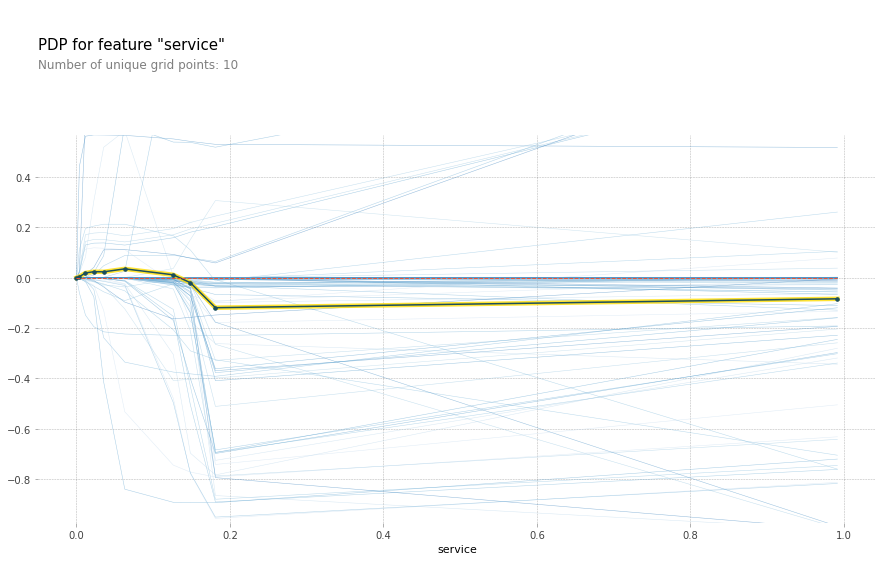

In [ ]:
!pip install pdpbox
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

feature_name = "service"
# Create the data that we will plot
pdp_goals = pdp.pdp_isolate(model=loaded_model, dataset=X_test, model_features=X_test.columns, 
                            feature=feature_name)

# plot it
pdp.pdp_plot(pdp_goals, feature_name, plot_lines=True, frac_to_plot=100)
plt.show()


     |████████████████████████████████| 358kB 6.3MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491635 sha256=ac15708df7481db1ddbb54d4ebfe97f81b601522046cd83513532977a62d0be1
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


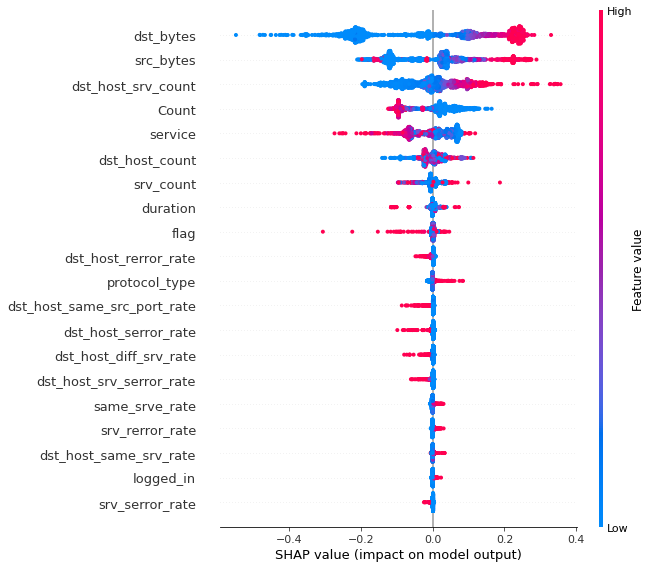

In [ ]:
!pip install shap
import shap
import pandas as pd 

sample = X_test.iloc[:2000]
 
explainer = shap.DeepExplainer(loaded_model, np.array(sample))
shap_values =
 explainer.shap_values(np.array(sample))

shap.initjs()
#force_plot = shap.force_plot(explainer.expected_value[0].numpy().tolist(), shap_values[0], sample)
shap.summary_plot(shap_values[0], sample)

In [ ]:
#%%
import shap  # package used to calculate Shap values

index = 22
row_to_show = X_test.iloc[index:index+1]
print(loaded_model.predict(row_to_show))
shap_values = explainer.shap_values(np.array(row_to_show))
print('shap_values: ', shap_values[0])
print('explainer ', explainer.expected_value[0].numpy().tolist())
shap.initjs()
shap.force_plot(explainer.expected_value[0].numpy().tolist(), shap_values[0], row_to_show) 

[[0.9999963]]
shap_values:  [[ 6.37544186e-03 -7.28343427e-04  6.61166776e-02  1.35628022e-03
   2.98148895e-02  2.37503620e-01  0.00000000e+00  3.44694768e-05
   0.00000000e+00  1.64556736e-05  2.01769915e-06  3.96139195e-04
   1.55179172e-06  4.57716932e-07  6.08940567e-11  2.87868413e-09
   1.88950330e-07  5.76986266e-09  7.22331936e-09  0.00000000e+00
   0.00000000e+00  5.45231320e-06  1.95116734e-02 -6.00814456e-03
   5.83608017e-04  7.19962426e-04 -7.81013305e-05 -8.18929724e-04
  -1.93010814e-04  4.28683893e-04 -5.88723352e-05  7.69201744e-03
   2.10106171e-02  1.56708706e-04  1.14187292e-03  1.08366562e-03
   2.12208974e-04  8.42583668e-04  1.02682915e-03  1.69538007e-03
  -1.00999990e-03]]
explainer  0.6111621856689453
